# Titanic Survival Prediction - Kaggle Data Science Project

## Overview

This notebook presents a complete data science workflow for the [Kaggle Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) competition. The goal is to predict which passengers survived the Titanic shipwreck using passenger data such as age, gender, ticket class, and more.

## Contents

- **Data Loading & Exploration:** Import and inspect the Titanic dataset.
- **Feature Engineering:** Create new features and transform existing ones to improve model performance.
- **Data Preprocessing:** Handle missing values and encode categorical variables.
- **Model Building:** Train and tune several machine learning models (Random Forest, Decision Tree, KNN, SVM, Logistic Regression, Naive Bayes).
- **Validation:** Compare model performance using a validation data set.
- **Submission:** Generate predictions for the test set and prepare submission files.

## Table of Contents

1. [Overview](#overview)
2. [Import Libraries](#1-import-libraries)
3. [Load Data](#2-load-data)
4. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
    - [Data Overview](#31-data-overview)
    - [Feature Analysis](#32-feature-analysis)
5. [Feature Engineering](#4-feature-engineering)
6. [Data Preprocessing](#5-data-preprocessing)
7. [Model Building and Hyperparameter Tuning](#6-model-building-and-hyperparameter-tuning)
    - [Random Forest Classifier](#61-random-forest-classifier)
    - [Decision Tree Classifier](#62-decision-tree-classifier)
    - [K-Neighbors Classifier](#63-k-neighbors-classifier)
    - [Support Vector Classifier](#64-support-vector-classifier)
    - [Logistic Regression](#65-logistic-regression)
    - [Gaussian Naive Bayes](#66-gaussian-naive-bayes)
8. [Validation](#7-validation)
9. [Generate Predictions and Submission Files](#8-generate-predictions-and-submission-files)
10. [Conclusion](#9-conclusion)

## How to Use

1. Place `train.csv` and `test.csv` in the same directory as this notebook.
2. Run all cells in order. All necessary libraries are imported at the top.
3. The notebook will output predictions for multiple models in the `submission/` directory.

---


## 1. Import Libraries

Import all necessary Python libraries for data analysis, visualization, and machine learning.

In [322]:
# import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report


## 2. Load Data

Read the Titanic training and test datasets into pandas DataFrames.

In [323]:
# importing the data
train_df=pd.read_csv('..\\data\\train.csv')
test_df=pd.read_csv('..\\data\\test.csv')

## 3. Exploratory Data Analysis (EDA)

In this section, we explore the dataset to understand the distribution of features and their relationship with survival. This helps us identify important variables and potential data quality issues.

### 3.1. Data Overview
Let's look at the first few rows and summary statistics.

In [324]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [326]:
train_df.describe() # descriptive statistivs for numerical values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [327]:
train_df.describe(include=['O']) # descriptive statistics only for object-type

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [328]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3.2. Feature Analysis

Analyze the influence of features such as Pclass, Sex, SibSp, Parch, FamilySize, Embarked, Age, Fare, Name, Ticket, and Cabin on survival.

In [329]:
# Pclass influence

# group the passenger by class
# select the survived column to work with
# calculate the average survival rate for each class
# keep Pclass as a regular column unstead of turning it into index
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [330]:
#Sex influence
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [331]:
#influence of sibling/ spouse number
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [332]:
# influence of child / parent number 
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## 4. Feature Engineering

Create new features and transform existing ones to improve model performance.

In [333]:
# create FamilySize column ( grouping Parch & SibSp)
train_df['FamilySize']= train_df['SibSp'] + train_df['Parch'] +1
test_df['FamilySize']=test_df['SibSp']+ test_df['Parch']+1

In [334]:
# influence of family size
train_df.groupby(['FamilySize'], as_index=False)['Survived'].mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [335]:
# grouping by family size

Family_map={1:'Alone', 2:'Small', 3:'Small', 4:'Small',5:'Medium', 6:'Medium', 7:'Large', 8:'Large',11:'Large' }
train_df['FamilySizeGroup']=train_df['FamilySize'].map(Family_map)
test_df['FamilySizeGroup']=test_df['FamilySize'].map(Family_map)

In [336]:
# influence of family group size
train_df.groupby(['FamilySizeGroup'], as_index=False)['Survived'].mean()


,FamilySizeGroup,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [337]:
# influence of embarquement place
train_df.groupby( ['Embarked'], as_index=False)['Survived'].mean()


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


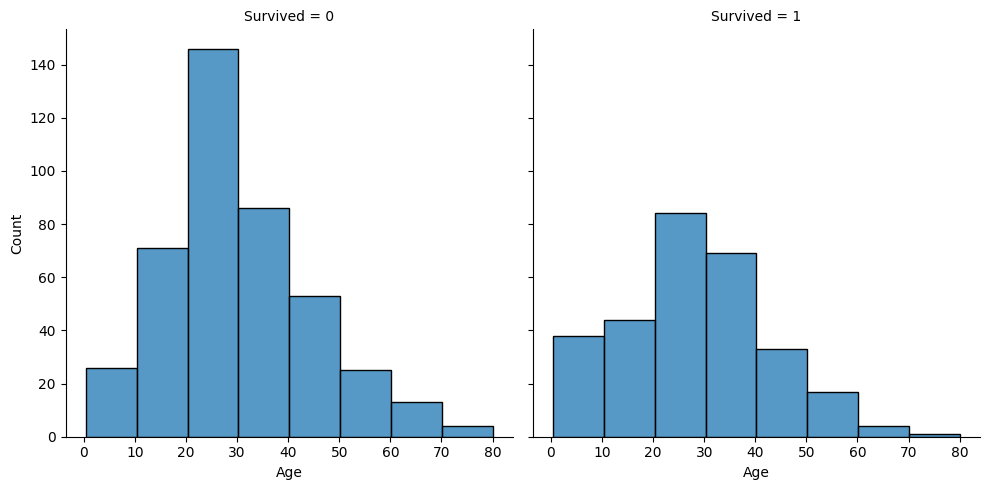

In [338]:
#influence of Age
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)
plt.show()

In [339]:
# Q cut on Age
train_df['AgeCut']=pd.qcut(train_df['Age'], 8)
test_df['AgeCut']=pd.qcut(test_df['Age'], 8)
#influence of Age Cut
train_df.groupby( ['AgeCut'], as_index=False)['Survived'].mean()

C:\Users\ledoe\AppData\Local\Temp\ipykernel_23392\1597491002.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby( ['AgeCut'], as_index=False)['Survived'].mean()


,AgeCut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [340]:
# define numerical value for different Age Cut

train_df.loc[train_df['Age'] <=16, 'Age']=0
train_df.loc[(train_df['Age'] >16) & (train_df['Age'] <=20.125), 'Age']=1
train_df.loc[(train_df['Age'] >20.125) & (train_df['Age'] <=24.0), 'Age']=2
train_df.loc[(train_df['Age'] >24.0) & (train_df['Age'] <=28.0), 'Age']=3
train_df.loc[(train_df['Age'] >28.0) & (train_df['Age'] <=32.312), 'Age']=4
train_df.loc[(train_df['Age'] >32.312) & (train_df['Age'] <=38.0), 'Age']=5
train_df.loc[(train_df['Age'] >38.0) & (train_df['Age'] <=47.0), 'Age']=6
train_df.loc[train_df['Age'] >47.0, 'Age']=7



In [341]:
test_df.loc[test_df['Age'] <=16, 'Age']=0
test_df.loc[(test_df['Age'] >16) & (test_df['Age'] <=20.125), 'Age']=1
test_df.loc[(test_df['Age'] >20.125) & (test_df['Age'] <=24.0), 'Age']=2
test_df.loc[(test_df['Age'] >24.0) & (test_df['Age'] <=28.0), 'Age']=3
test_df.loc[(test_df['Age'] >28.0) & (test_df['Age'] <=32.312), 'Age']=4
test_df.loc[(test_df['Age'] >32.312) & (test_df['Age'] <=38.0), 'Age']=5
test_df.loc[(test_df['Age'] >38.0) & (test_df['Age'] <=47.0), 'Age']=6
test_df.loc[test_df['Age'] >47.0, 'Age']=7

In [342]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGroup,AgeCut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


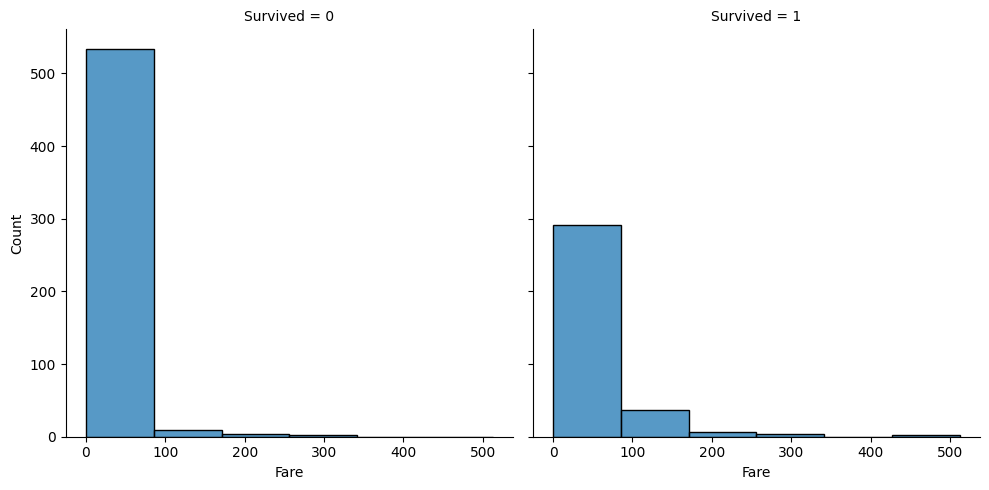

In [343]:
#influence of Fare 
sns.displot(train_df, x='Fare', col='Survived', binwidth=80, height=5)
plt.show()

In [344]:
train_df['Fare_Cut']=pd.qcut(train_df['Fare'],6)
test_df['Fare_Cut']=pd.qcut(test_df['Fare'],6)


In [345]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\ledoe\AppData\Local\Temp\ipykernel_23392\1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [346]:
# define numerical value for different Fare Cut

train_df.loc[train_df['Fare'] <=7.775, 'Fare']=0
train_df.loc[(train_df['Fare'] >7.775) & (train_df['Fare'] <=8.662), 'Fare']=1
train_df.loc[(train_df['Fare'] >8.662) & (train_df['Fare'] <=14.454), 'Fare']=2
train_df.loc[(train_df['Fare'] >14.454) & (train_df['Fare'] <=26.0), 'Fare']=3
train_df.loc[(train_df['Fare'] >26.0) & (train_df['Fare'] <=52.369), 'Fare']=4
train_df.loc[train_df['Fare'] >52.369, 'Fare']=5

test_df.loc[train_df['Fare'] <=7.775, 'Fare']=0
test_df.loc[(train_df['Fare'] >7.775) & (test_df['Fare'] <=8.662), 'Fare']=1
test_df.loc[(train_df['Fare'] >8.662) & (test_df['Fare'] <=14.454), 'Fare']=2
test_df.loc[(train_df['Fare'] >14.454) & (test_df['Fare'] <=26.0), 'Fare']=3
test_df.loc[(train_df['Fare'] >26.0) & (test_df['Fare'] <=52.369), 'Fare']=4
test_df.loc[train_df['Fare'] >52.369, 'Fare']=5

In [347]:
#influence of the Name
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [348]:
train_df['Title']=train_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())
test_df['Title']=test_df['Name'].str.split(pat=',', expand=True)[1].str.split(pat='.', expand=True)[0].apply(lambda x:x.strip())


In [ ]:
missing_count = train_df['Title'].isna().sum()
missing_count


np.int64(0)

np.int64(0)

In [ ]:

train_df.groupby(['Title'], as_index=False)['Survived'].agg(
    SurvivalRate=('mean'),
    Count=('count')
)

,Title,SurvivalRate,Count
0,Capt,0.000000,1
1,Col,0.500000,2
2,Don,0.000000,1
3,Dr,0.428571,7
4,Jonkheer,0.000000,1
5,Lady,1.000000,1
6,Major,0.500000,2
7,Master,0.575000,40
8,Miss,0.697802,182
9,Mlle,1.000000,2


In [ ]:
#military : Capt, Col, Major
#noble: Jonkheer, the countess, Don, Lady, Sir
#unmarried Female= Mlle, Ms


In [ ]:
train_df['Title'] = train_df['Title'].replace(
    {
        'Capt':'Military',
        'Col':'Military',
        'Major':'Military',
        'Jonkheer':'Noble',
        'the Countess':'Noble',
        'Don': 'Noble',
        'Lady': 'Noble',
        'Sir': 'Noble',
        'Mlle': 'Noble',
        'Ms':'Noble',
        'Mme':'Noble'
    }
)

test_df['Title'] = test_df['Title'].replace(
    {
        'Capt':'Military',
        'Col':'Military',
        'Major':'Military',
        'Jonkheer':'Noble',
        'the Countess':'Noble',
        'Don': 'Noble',
        'Lady': 'Noble',
        'Sir': 'Noble',
        'Mlle': 'Noble',
        'Ms':'Noble',
        'Mme':'Noble'
    }
)

In [ ]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(
    SurvivalRate=('mean'),
    Count=('count')
)

,Title,SurvivalRate,Count
0,Dr,0.428571,7
1,Master,0.575000,40
2,Military,0.400000,5
3,Miss,0.697802,182
4,Mr,0.156673,517
5,Mrs,0.792000,125
6,Noble,0.777778,9
7,Rev,0.000000,6


In [ ]:
train_df['Name_length']=train_df['Name'].apply(lambda x:len(x))
test_df['Name_length']=test_df['Name'].apply(lambda x:len(x))

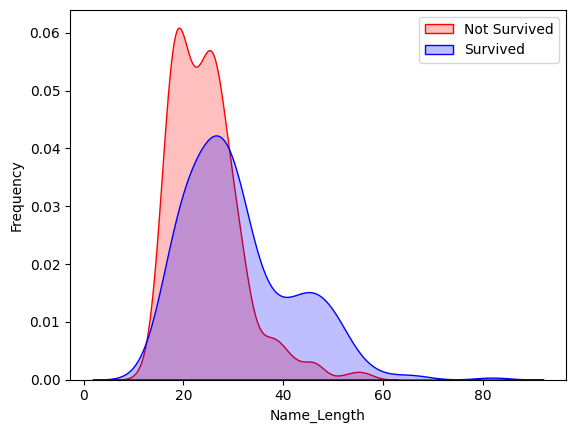

In [ ]:
g=sns.kdeplot(train_df['Name_length'][(train_df['Survived']==0) & (train_df['Name_length'].notnull())], color='Red', fill=True)
g=sns.kdeplot(train_df['Name_length'][(train_df['Survived']==1) & (train_df['Name_length'].notnull())], ax=g, color='Blue', fill=True)

g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g=g.legend(['Not Survived', 'Survived'])
plt.show()


In [ ]:
train_df['Name_LengthGB']=pd.qcut(train_df['Name_length'],8)
test_df['Name_LengthGB']=pd.qcut(test_df['Name_length'],6)
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].agg(
    SurvivalRate=('mean'),
    Count=('count')
)


C:\Users\ledoe\AppData\Local\Temp\ipykernel_23392\4030799671.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].agg(


,Name_LengthGB,SurvivalRate,Count
0,"(11.999, 18.0]",0.214286,140
1,"(18.0, 20.0]",0.252427,103
2,"(20.0, 23.0]",0.307692,117
3,"(23.0, 25.0]",0.346939,98
4,"(25.0, 27.25]",0.292929,99
5,"(27.25, 30.0]",0.428571,112
6,"(30.0, 38.0]",0.517241,116
7,"(38.0, 82.0]",0.745283,106


In [ ]:
# define numerical value for different NameLength Cut

train_df.loc[train_df['Name_length'] <=18, 'Name_Size']=0
train_df.loc[(train_df['Name_length'] >18) & (train_df['Name_length'] <=20), 'Name_Size']=1
train_df.loc[(train_df['Name_length'] >20) & (train_df['Name_length'] <=23), 'Name_Size']=2
train_df.loc[(train_df['Name_length'] >23) & (train_df['Name_length'] <=25), 'Name_Size']=3
train_df.loc[(train_df['Name_length'] >25) & (train_df['Name_length'] <=27.25), 'Name_Size']=4
train_df.loc[(train_df['Name_length'] >27.25) & (train_df['Name_length'] <=30), 'Name_Size']=5
train_df.loc[(train_df['Name_length'] >30) & (train_df['Name_length'] <=38), 'Name_Size']=6
train_df.loc[train_df['Name_length'] >38, 'Name_Size']=7

test_df.loc[test_df['Name_length'] <=18, 'Name_Size']=0
test_df.loc[(test_df['Name_length'] >18) & (test_df['Name_length'] <=20), 'Name_Size']=1
test_df.loc[(test_df['Name_length'] >20) & (test_df['Name_length'] <=23), 'Name_Size']=2
test_df.loc[(test_df['Name_length'] >23) & (test_df['Name_length'] <=25), 'Name_Size']=3
test_df.loc[(test_df['Name_length'] >25) & (test_df['Name_length'] <=27.25), 'Name_Size']=4
test_df.loc[(test_df['Name_length'] >27.25) & (test_df['Name_length'] <=30), 'Name_Size']=5
test_df.loc[(test_df['Name_length'] >30) & (test_df['Name_length'] <=38), 'Name_Size']=6
test_df.loc[test_df['Name_length'] >38, 'Name_Size']=7

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilySizeGroup,AgeCut,Fare_Cut,Title,Name_length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [ ]:
#influence of ticket name
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [ ]:
train_df['Ticket_Number']=train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['Ticket_Number']=test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [ ]:
train_df.groupby(['Ticket_Number'], as_index=False)['Survived'].agg(
    SurvivalRate=('mean'),
    Count=('count')
).sort_values('Count', ascending=False)

,Ticket_Number,SurvivalRate,Count
196,2343,0.000000,7
94,1601,0.714286,7
464,347082,0.000000,7
168,2144,0.000000,6
468,347088,0.000000,6
...,...,...,...
674,8475,0.000000,1
675,851,0.000000,1
676,9234,1.000000,1
61,11765,1.000000,1


In [ ]:
train_df['Ticket_Number_Count']=train_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')
test_df['Ticket_Number_Count']=test_df.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [ ]:
train_df.groupby(['Ticket_Number_Count'], as_index=False)['Survived'].agg(
    SurvivalRate=('mean'),
    Count=('count')
).sort_values('Count', ascending=False)

,Ticket_Number_Count,SurvivalRate,Count
0,1,0.295956,544
1,2,0.569149,188
2,3,0.712121,66
3,4,0.500000,44
6,7,0.238095,21
5,6,0.000000,18
4,5,0.000000,10


In [ ]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [ ]:
train_df['Ticket_Location'] = np.where(
    train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(),
    train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()),
    'Blank'
)

test_df['Ticket_Location'] = np.where(
    test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(),
    test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()),
    'Blank'
)

In [ ]:
train_df['Ticket_Location']


0           A/5
1            PC
2      STON/O2.
3         Blank
4         Blank
         ...   
886       Blank
887       Blank
888       W./C.
889       Blank
890       Blank
Name: Ticket_Location, Length: 891, dtype: object

In [ ]:
train_df['Ticket_Location'].value_counts()

Ticket_Location
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
C               5
S.O.C.          5
SC/PARIS        5
F.C.C.          5
SC/Paris        4
A/4.            3
PP              3
A/4             3
S.O./P.P.       3
SC/AH           3
A./5.           2
P/PP            2
A.5.            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.C./A.4.       1
Fa              1
S.O.P.          1
SO/C            1
S.P.            1
A4.             1
W.E.P.          1
A/S             1
SC              1
SW/PP           1
SCO/W           1
W/C             1
S.W./PP         1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64

In [ ]:
# influence of the cabin

train_df['Cabin']=train_df['Cabin'].fillna('U')
train_df['Cabin']=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin']=test_df['Cabin'].fillna('U')
test_df['Cabin']=pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [ ]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['mean', 'count'])

,Cabin,mean,count
0,A,0.466667,15
1,B,0.744681,47
2,C,0.593220,59
3,D,0.757576,33
4,E,0.750000,32
5,F,0.615385,13
6,G,0.500000,4
7,T,0.000000,1
8,U,0.299854,687


In [ ]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [ ]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['mean', 'count'])

,Cabin_Assigned,mean,count
0,0,0.299854,687
1,1,0.666667,204


## 5. Data Preprocessing

Handle missing values and encode categorical variables for machine learning models.

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,AgeCut,Fare_Cut,Title,Name_length,Name_LengthGB,Name_Size,Ticket_Number,Ticket_Number_Count,Ticket_Location,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [ ]:
train_df.shape


(891, 24)

In [ ]:
test_df.shape

(418, 23)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  FamilySize           891 non-null    int64   
 13  FamilySizeGroup      891 non-null    object  
 14  AgeCut               714 non-null    category
 15  Fare_Cut             89

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FamilySizeGroup', 'AgeCut', 'Fare_Cut', 'Title', 'Name_length',
       'Name_LengthGB', 'Name_Size', 'Ticket_Number', 'Ticket_Number_Count',
       'Ticket_Location', 'Cabin_Assigned'],
      dtype='object')

In [ ]:
# fill the missing information Age & Fare by the mean value
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeCut,Fare_Cut,Title,Name_length,Name_LengthGB,Name_Size,Ticket_Number,Ticket_Number_Count,Ticket_Location,Cabin_Assigned
0,892,3,"Kelly, Mr. James",male,5.0,0,0,330911,0.0,U,...,"(32.0, 39.0]","(7.758, 8.662]",Mr,16,"(12.999, 18.5]",0.0,330911,1,Blank,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,6.0,1,0,363272,0.0,U,...,"(39.0, 48.0]","(-0.001, 7.758]",Mrs,32,"(28.0, 37.0]",6.0,363272,1,Blank,0
2,894,2,"Myles, Mr. Thomas Francis",male,7.0,0,0,240276,0.0,U,...,"(48.0, 76.0]","(8.662, 14.454]",Mr,25,"(22.0, 25.0]",3.0,240276,1,Blank,0
3,895,3,"Wirz, Mr. Albert",male,3.0,0,0,315154,0.0,U,...,"(24.0, 27.0]","(7.758, 8.662]",Mr,16,"(12.999, 18.5]",0.0,315154,1,Blank,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,0.0,U,...,"(21.0, 24.0]","(8.662, 14.454]",Mrs,44,"(37.0, 63.0]",7.0,3101298,1,Blank,0


## 6. Model Building and Hyperparameter Tuning

Build and tune several machine learning models using pipelines and grid search.

In [ ]:
ohe=OneHotEncoder(sparse_output=False)
ode=OrdinalEncoder
SI=SimpleImputer(strategy='most_frequent')

In [ ]:
ode_cols=['FamilySizeGroup']
ohe_col=['Sex', 'Embarked']

In [ ]:
# definition of the X data and Y data

X=train_df.drop(['Survived'], axis=1)
Y=train_df['Survived']
X_test=test_df.drop(['AgeCut','Fare_Cut'], axis=1)


In [ ]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=21)

In [ ]:
ordinal_pipeline=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])



In [ ]:
ohe_pipeline=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'FamilySizeGroup', 'AgeCut', 'Fare_Cut', 'Title', 'Name_length',
       'Name_LengthGB', 'Name_Size', 'Ticket_Number', 'Ticket_Number_Count',
       'Ticket_Location', 'Cabin_Assigned'],
      dtype='object')

In [ ]:
# tool that applies different transformations to specific columns
col_trans=ColumnTransformer(transformers=[
    ('impute', SI, ['Age']), #fill missing age values with most frequent value
    ('ord_pipeline',ordinal_pipeline, ode_cols ), # impute and encode ordinal categories as numbers
    ('ohe_pipeline', ohe_pipeline, ohe_col), # impute and encore one-hot nominal features
    ('passthrough', 'passthrough', ['Pclass', 'Ticket_Number_Count', 'Cabin_Assigned','Name_Size', 'Age']) # leave this column untouched
    ],
    remainder='drop', # drop any column not listed above
    n_jobs=-1 # use all available CPU cores for fast processing
)

### 6.1. Random Forest Classifier

Train and tune a Random Forest classifier using cross-validation and grid search.
The Random Forest algorithm is an ensemble method that builds multiple decision trees and merges their results to improve accuracy and control overfitting. It is robust to noise and can handle both numerical and categorical features well.


In [ ]:

rfc=RandomForestClassifier()

  - `n_estimators`: Controls the number of trees in the forest. More trees can improve performance but increase computation time.  
  - `min_samples_split`, `min_samples_leaf`: Prevent overfitting by requiring a minimum number of samples to split a node or be a leaf.  
  - `max_depth`: Limits the depth of each tree to avoid overfitting.  
  - `criterion`: Tests both 'gini' and 'entropy' to find the best split quality measure.


In [ ]:
param_grid={
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5,10,15],
    'max_depth': [8, 9,10,15, 20], 
    'min_samples_leaf': [1,2,4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
CV_rfc=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalrfc=make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute', ...), ('ord_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
0.8286319314488327


### 6.2. Decision Tree Classifier

Train and tune a Decision Tree classifier using cross-validation and grid search.
A Decision Tree classifier splits the data into branches based on feature values, making decisions at each node. It is easy to interpret and visualize, but can overfit if not properly tuned.


In [ ]:
dtc=DecisionTreeClassifier()

  - `min_samples_split`, `min_samples_leaf`, `max_depth`, `criterion`: Similar to Random Forest, these control tree complexity and splitting strategy to balance bias and variance.


In [ ]:
param_grid={
    'min_samples_split': [5,10,15],
    'max_depth': [10,20], 
    'min_samples_leaf': [1,2,4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
CV_dtc=GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinaldtc=make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute', ...), ('ord_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8187924751305033


### 6.3. K-Neighbors Classifier

Train and tune a K-Neighbors classifier using cross-validation and grid search. KNN is a simple, instance-based learning algorithm that classifies a data point based on the majority label among its k-nearest neighbors. It works well for small datasets and can capture non-linear relationships.


In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid={
    'n_neighbors':[3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p':[1,2],
}

  - `n_neighbors`: The number of neighbors to use for classification.  
  - `weights`: Tests uniform vs. distance weighting for neighbors.  
  - `algorithm`: Different algorithms for computing nearest neighbors; can affect speed and accuracy.  
  - `p`: Chooses between Manhattan (`p=1`) and Euclidean (`p=2`) distance.


In [ ]:
CV_knn=GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalknn=make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute', ...), ('ord_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.7991923569388358


### 6.4. Support Vector Classifier

Train and tune a SV classifier using cross-validation and grid search.

In [ ]:

svc=SVC()


  - `C`: Regularization parameter; smaller values specify stronger regularization.  
  - `kernel`: Tests different kernel functions to capture linear and non-linear relationships.


In [ ]:
param_grid={
    'C':[100,10,1.0,0.1,0.01,0.001],
    'kernel':['linear', 'poly', 'rbf','sigmoid' ]    
}

In [ ]:
CV_svc=GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinalsvc=make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute', ...), ('ord_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


pipefinalsvc=make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, Y_train)

In [ ]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.825874125874126


### 6.5. Logistic Regression

Train and tune a Logistic Regression using cross-validation and grid search.
Logistic Regression is a linear model for binary classification that estimates the probability of a class using the logistic function. It is interpretable and works well when the relationship between features and the target is approximately linear.


In [ ]:
lr=LogisticRegression()

  - `C`: Inverse of regularization strength; smaller values mean stronger regularization. Grid search helps find the best trade-off between bias and variance.


In [ ]:
param_grid={
    'C':[100,10,1.0,0.1,0.01,0.001],
}

In [ ]:
CV_lr=GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [ ]:
pipefinallr=make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute', ...), ('ord_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 1.0}
0.8019698611247907


### 6.6. Gaussian Naive Bayes

Train and tune a Gaussian Naive Bayes using cross-validation and grid search.Gaussian Naive Bayes is a probabilistic classifier based on Bayes’ theorem, assuming features are independent and normally distributed. It is fast, simple, and works well with high-dimensional data.

In [ ]:
gnb=GaussianNB()

In [ ]:
param_grid={
    'var_smoothing':[0.00000001,0.000000001,0.00000001],
}

In [ ]:
CV_gnb=GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

  - `var_smoothing`: Adds a small value to the variance to avoid division by zero and improve numerical stability. Grid search helps find the optimal value.


In [ ]:
pipefinalgnb=make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, Y_train)

,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute', ...), ('ord_pipeline', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7935585541219344


In [ ]:
print('RFC:',CV_rfc.best_score_)
print('DTC:',CV_dtc.best_score_)
print('KNN:',CV_knn.best_score_)
print('SVC:',CV_svc.best_score_)
print('LR:',CV_lr.best_score_)
print('GNB:',CV_gnb.best_score_)



RFC: 0.8286319314488327
DTC: 0.8187924751305033
KNN: 0.7991923569388358
SVC: 0.825874125874126
LR: 0.8019698611247907
GNB: 0.7935585541219344


The random forest classifier has the best cross validation score.

## 7. Model Validation


In [ ]:


# Validation of the Random Forest Classifier
y_pred_valid = pipefinalrfc.predict(X_valid)
print("Random Forest Validation Accuracy:", accuracy_score(Y_valid, y_pred_valid))


Random Forest Validation Accuracy: 0.7988826815642458


In [ ]:
# Validation of the Decision Tree Classifier
y_pred_valid = pipefinaldtc.predict(X_valid)
print("Decision Tree Classifier Validation Accuracy:", accuracy_score(Y_valid, y_pred_valid))


Decision Tree Classifier Validation Accuracy: 0.7988826815642458


In [ ]:
# Validation of the K-Nearest Neighbors Classifier
y_pred_valid = pipefinalknn.predict(X_valid)
print("K-Nearest Neighbors Classifier Validation Accuracy:", accuracy_score(Y_valid, y_pred_valid))


K-Nearest Neighbors Classifier Validation Accuracy: 0.770949720670391


In [ ]:
# Validation of the Support Vector Classifier
y_pred_valid = pipefinalsvc.predict(X_valid)
print("Support Vector Classifier Validation Accuracy:", accuracy_score(Y_valid, y_pred_valid))


Support Vector Classifier Validation Accuracy: 0.7877094972067039


In [ ]:
# Validation of the Logistic Regression
y_pred_valid = pipefinallr.predict(X_valid)

print("Logistic Regression Validation Accuracy:", accuracy_score(Y_valid, y_pred_valid))


Logistic Regression Validation Accuracy: 0.8100558659217877


In [ ]:
# Validation of the Gaussian Naive Bayes
y_pred_valid = pipefinalgnb.predict(X_valid)

print("Gaussian Naive Bayes Validation Accuracy:", accuracy_score(Y_valid, y_pred_valid))


Gaussian Naive Bayes Validation Accuracy: 0.770949720670391


The logistic regression seems to perform better on the validation test.

## 8. Generate Predictions and Submission Files

Use the trained models to predict survival on the test set and save the results for Kaggle submission.

In [350]:
Y_pred0=pipefinalrfc.predict(X_test)
Y_pred1=pipefinaldtc.predict(X_test)
Y_pred2=pipefinalknn.predict(X_test)
Y_pred3=pipefinalsvc.predict(X_test)
Y_pred4=pipefinallr.predict(X_test)
Y_pred5=pipefinalgnb.predict(X_test)


KeyboardInterrupt: 

In [ ]:
submission0=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred0
})

submission1=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred1
})
submission2=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred2
})
submission3=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred3
})
submission4=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred4
})
submission5=pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':Y_pred5
})



In [ ]:
submission0.to_csv('../submissions/submission0.csv', index=False)
submission1.to_csv('../submissions/submission1.csv', index=False)
submission2.to_csv('../submissions/submission2.csv', index=False)
submission3.to_csv('../submissions/submission3.csv', index=False)
submission4.to_csv('../submissions/submission4.csv', index=False)
submission5.to_csv('../submissions/submission5.csv', index=False)

Score after submission on Kaggle:
  - Random Forest Classifier: 0.76794.
  - Decision Tree Classifier: 0.78468.
  - K-Nearest Neighbors Classifier: 0.77033.
  - Support Vector Classifier: 0.77033.
  - Logistic Regression: 0.75837.
  - Gaussian Naive Bayes: 0.73205.

At the end, the Decision Tree Classifier performs the best.


## 9. Conclusion

In this notebook, we explored the Titanic dataset and applied a complete data science workflow: from data cleaning and feature engineering to model selection and evaluation. Multiple machine learning models were trained and tuned using cross-validation and a hold-out validation set.

While Logistic Regression achieved the highest accuracy on the local validation set, the Decision Tree Classifier performed best on the actual Kaggle test set, achieving the highest public leaderboard score among all tested models. This highlights the importance of evaluating models on truly unseen data, as validation results may not always generalize perfectly to new datasets.

Key takeaways:
- Feature engineering and careful preprocessing significantly impact model performance.
- Model selection should consider both cross-validation and external test results.
- Simpler models like Logistic Regression can generalize well, but more complex models such as Decision Trees may perform better on certain datasets.
- It is beneficial to try multiple algorithms and compare their results on both validation and test sets.

For further improvement, ensemble methods or more advanced feature engineering could be explored. 